<a href="https://colab.research.google.com/github/Laxmib123/-Employee-HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import os
os.makedirs("charts", exist_ok=True)

In [214]:
import sqlite3

# Create in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [215]:


# Create table
cursor.execute('''
CREATE TABLE Employees (
    EmpID TEXT PRIMARY KEY,
    Name TEXT,
    Department TEXT,
    Gender TEXT,
    Salary INTEGER,
    YearsAtCompany INTEGER,
    Age INTEGER,
    JobRole TEXT
)
''')

# List of all employees as tuples
employees_data = [
    ('E001', 'Ram', 'Sales', 'Male', 55000, 2, 28, 'Sales Executive'),
    ('E002', 'Sita', 'HR', 'Female', 48000, 4, 32, 'HR Manager'),
    ('E003', 'Hari', 'IT', 'Male', 60000, 1, 26, 'Software Engineer'),
    ('E004', 'Gita', 'Sales', 'Female', 52000, 3, 29, 'Sales Executive'),
    ('E005', 'Ramesh', 'Finance', 'Male', 47000, 5, 35, 'Accountant'),
    ('E006', 'Suman', 'IT', 'Male', 75000, 6, 38, 'Senior Developer'),
    ('E007', 'Anita', 'HR', 'Female', 45000, 2, 27, 'HR Executive'),
    ('E008', 'Bikash', 'Sales', 'Male', 58000, 1, 25, 'Sales Executive'),
    ('E009', 'Rekha', 'Finance', 'Female', 50000, 3, 30, 'Accountant'),
    ('E010', 'Sujan', 'IT', 'Male', 65000, 2, 28, 'Software Engineer'),
    ('E011', 'Kiran', 'IT', 'Male', 61000, 3, 29, 'Software Engineer'),
    ('E012', 'Mina', 'Sales', 'Female', 53000, 2, 27, 'Sales Executive'),
    ('E013', 'Dipak', 'Finance', 'Male', 48000, 4, 33, 'Accountant'),
    ('E014', 'Laxmi', 'HR', 'Female', 46000, 1, 25, 'HR Executive'),
    ('E015', 'Prakash', 'IT', 'Male', 72000, 5, 36, 'Senior Developer'),
    ('E016', 'Sabina', 'Sales', 'Female', 59000, 2, 28, 'Sales Executive'),
    ('E017', 'Raj', 'Finance', 'Male', 51000, 3, 31, 'Accountant'),
    ('E018', 'Pooja', 'HR', 'Female', 47000, 2, 26, 'HR Executive'),
    ('E019', 'Anil', 'IT', 'Male', 64000, 4, 30, 'Software Engineer'),
    ('E020', 'Sonal', 'Sales', 'Female', 56000, 1, 24, 'Sales Executive'),
    ('E021', 'Manoj', 'IT', 'Male', 63000, 3, 29, 'Software Engineer'),
    ('E022', 'Rina', 'Sales', 'Female', 54000, 2, 27, 'Sales Executive'),
    ('E023', 'Kamal', 'Finance', 'Male', 49000, 4, 32, 'Accountant'),
    ('E024', 'Sita', 'HR', 'Female', 46000, 3, 28, 'HR Executive'),
    ('E025', 'Nabin', 'IT', 'Male', 71000, 5, 35, 'Senior Developer'),
    ('E026', 'Bina', 'Sales', 'Female', 57000, 1, 25, 'Sales Executive'),
    ('E027', 'Ramesh', 'Finance', 'Male', 50000, 2, 30, 'Accountant'),
    ('E028', 'Anita', 'HR', 'Female', 45000, 2, 26, 'HR Executive'),
    ('E029', 'Sujan', 'IT', 'Male', 65000, 4, 31, 'Software Engineer'),
    ('E030', 'Mina', 'Sales', 'Female', 53000, 3, 28, 'Sales Executive'),
    ('E031', 'Ram', 'Sales', 'Male', 56000, 2, 29, 'Sales Executive'),
    ('E032', 'Hari', 'IT', 'Male', 62000, 1, 27, 'Software Engineer'),
    ('E033', 'Pooja', 'HR', 'Female', 47000, 2, 26, 'HR Executive'),
    ('E034', 'Dipak', 'Finance', 'Male', 48000, 3, 33, 'Accountant'),
    ('E035', 'Sabina', 'Sales', 'Female', 59000, 2, 28, 'Sales Executive'),
    ('E036', 'Anil', 'IT', 'Male', 64000, 4, 30, 'Software Engineer'),
    ('E037', 'Rekha', 'Finance', 'Female', 50000, 3, 31, 'Accountant'),
    ('E038', 'Gita', 'Sales', 'Female', 52000, 3, 29, 'Sales Executive'),
    ('E039', 'Suman', 'IT', 'Male', 75000, 6, 38, 'Senior Developer'),
    ('E040', 'Kiran', 'IT', 'Male', 61000, 3, 29, 'Software Engineer'),
    ('E041', 'Rohit', 'IT', 'Male', 68000, 2, 30, 'Software Engineer'),
    ('E042', 'Maya', 'Sales', 'Female', 55000, 3, 27, 'Sales Executive'),
    ('E043', 'Sanjay', 'Finance', 'Male', 47000, 4, 33, 'Accountant'),
    ('E044', 'Rekha', 'HR', 'Female', 46000, 2, 28, 'HR Executive'),
    ('E045', 'Dipesh', 'IT', 'Male', 72000, 5, 36, 'Senior Developer'),
    ('E046', 'Anju', 'Sales', 'Female', 58000, 1, 26, 'Sales Executive'),
    ('E047', 'Ramesh', 'Finance', 'Male', 50000, 3, 31, 'Accountant'),
    ('E048', 'Pooja', 'HR', 'Female', 47000, 2, 27, 'HR Executive'),
    ('E049', 'Sujan', 'IT', 'Male', 65000, 2, 28, 'Software Engineer'),
    ('E050', 'Bina', 'Sales', 'Female', 54000, 1, 25, 'Sales Executive')
]

cursor.executemany('''
INSERT INTO Employees (EmpID, Name, Department, Gender, Salary, YearsAtCompany, Age, JobRole)
VALUES (?, ?, ?, ?, ?, ?, ?, ?)
''', employees_data)


In [216]:

#Show all employee
sql = "SELECT * FROM Employees"
cursor.execute(sql)
for row in cursor.fetchall():
    print(row)
# for i in cursor.fetchall():
#   print(i)

('E001', 'Ram', 'Sales', 'Male', 55000, 2, 28, 'Sales Executive')
('E002', 'Sita', 'HR', 'Female', 48000, 4, 32, 'HR Manager')
('E003', 'Hari', 'IT', 'Male', 60000, 1, 26, 'Software Engineer')
('E004', 'Gita', 'Sales', 'Female', 52000, 3, 29, 'Sales Executive')
('E005', 'Ramesh', 'Finance', 'Male', 47000, 5, 35, 'Accountant')
('E006', 'Suman', 'IT', 'Male', 75000, 6, 38, 'Senior Developer')
('E007', 'Anita', 'HR', 'Female', 45000, 2, 27, 'HR Executive')
('E008', 'Bikash', 'Sales', 'Male', 58000, 1, 25, 'Sales Executive')
('E009', 'Rekha', 'Finance', 'Female', 50000, 3, 30, 'Accountant')
('E010', 'Sujan', 'IT', 'Male', 65000, 2, 28, 'Software Engineer')
('E011', 'Kiran', 'IT', 'Male', 61000, 3, 29, 'Software Engineer')
('E012', 'Mina', 'Sales', 'Female', 53000, 2, 27, 'Sales Executive')
('E013', 'Dipak', 'Finance', 'Male', 48000, 4, 33, 'Accountant')
('E014', 'Laxmi', 'HR', 'Female', 46000, 1, 25, 'HR Executive')
('E015', 'Prakash', 'IT', 'Male', 72000, 5, 36, 'Senior Developer')
('E016

In [217]:
#Show employees from IT department only.

sql = "SELECT * FROM Employees WHERE Department = 'IT'"
cursor.execute(sql)

for row in cursor.fetchall():
  print(row)





('E003', 'Hari', 'IT', 'Male', 60000, 1, 26, 'Software Engineer')
('E006', 'Suman', 'IT', 'Male', 75000, 6, 38, 'Senior Developer')
('E010', 'Sujan', 'IT', 'Male', 65000, 2, 28, 'Software Engineer')
('E011', 'Kiran', 'IT', 'Male', 61000, 3, 29, 'Software Engineer')
('E015', 'Prakash', 'IT', 'Male', 72000, 5, 36, 'Senior Developer')
('E019', 'Anil', 'IT', 'Male', 64000, 4, 30, 'Software Engineer')
('E021', 'Manoj', 'IT', 'Male', 63000, 3, 29, 'Software Engineer')
('E025', 'Nabin', 'IT', 'Male', 71000, 5, 35, 'Senior Developer')
('E029', 'Sujan', 'IT', 'Male', 65000, 4, 31, 'Software Engineer')
('E032', 'Hari', 'IT', 'Male', 62000, 1, 27, 'Software Engineer')
('E036', 'Anil', 'IT', 'Male', 64000, 4, 30, 'Software Engineer')
('E039', 'Suman', 'IT', 'Male', 75000, 6, 38, 'Senior Developer')
('E040', 'Kiran', 'IT', 'Male', 61000, 3, 29, 'Software Engineer')
('E041', 'Rohit', 'IT', 'Male', 68000, 2, 30, 'Software Engineer')
('E045', 'Dipesh', 'IT', 'Male', 72000, 5, 36, 'Senior Developer')
(

In [218]:
#Show employees whose salary > 60,000.

sql = "SELECT * FROM Employees WHERE salary > 60000"
cursor.execute(sql)

for row in cursor.fetchall():
  print(row)


('E006', 'Suman', 'IT', 'Male', 75000, 6, 38, 'Senior Developer')
('E010', 'Sujan', 'IT', 'Male', 65000, 2, 28, 'Software Engineer')
('E011', 'Kiran', 'IT', 'Male', 61000, 3, 29, 'Software Engineer')
('E015', 'Prakash', 'IT', 'Male', 72000, 5, 36, 'Senior Developer')
('E019', 'Anil', 'IT', 'Male', 64000, 4, 30, 'Software Engineer')
('E021', 'Manoj', 'IT', 'Male', 63000, 3, 29, 'Software Engineer')
('E025', 'Nabin', 'IT', 'Male', 71000, 5, 35, 'Senior Developer')
('E029', 'Sujan', 'IT', 'Male', 65000, 4, 31, 'Software Engineer')
('E032', 'Hari', 'IT', 'Male', 62000, 1, 27, 'Software Engineer')
('E036', 'Anil', 'IT', 'Male', 64000, 4, 30, 'Software Engineer')
('E039', 'Suman', 'IT', 'Male', 75000, 6, 38, 'Senior Developer')
('E040', 'Kiran', 'IT', 'Male', 61000, 3, 29, 'Software Engineer')
('E041', 'Rohit', 'IT', 'Male', 68000, 2, 30, 'Software Engineer')
('E045', 'Dipesh', 'IT', 'Male', 72000, 5, 36, 'Senior Developer')
('E049', 'Sujan', 'IT', 'Male', 65000, 2, 28, 'Software Engineer')


In [219]:
#Show employees whose name starts with “R”.
sql = "SELECT * fROM Employees WHERE name LIKE 'R%'"
cursor.execute(sql)

for row in cursor.fetchall():
  print(row)


('E001', 'Ram', 'Sales', 'Male', 55000, 2, 28, 'Sales Executive')
('E005', 'Ramesh', 'Finance', 'Male', 47000, 5, 35, 'Accountant')
('E009', 'Rekha', 'Finance', 'Female', 50000, 3, 30, 'Accountant')
('E017', 'Raj', 'Finance', 'Male', 51000, 3, 31, 'Accountant')
('E022', 'Rina', 'Sales', 'Female', 54000, 2, 27, 'Sales Executive')
('E027', 'Ramesh', 'Finance', 'Male', 50000, 2, 30, 'Accountant')
('E031', 'Ram', 'Sales', 'Male', 56000, 2, 29, 'Sales Executive')
('E037', 'Rekha', 'Finance', 'Female', 50000, 3, 31, 'Accountant')
('E041', 'Rohit', 'IT', 'Male', 68000, 2, 30, 'Software Engineer')
('E044', 'Rekha', 'HR', 'Female', 46000, 2, 28, 'HR Executive')
('E047', 'Ramesh', 'Finance', 'Male', 50000, 3, 31, 'Accountant')


In [220]:
#Find employees who joined ≤ 2 years ago.
sql = "SELECT * fROM Employees WHERE YearsAtCompany <= 2"
cursor.execute(sql)

for row in cursor.fetchall():
  print(row)


('E001', 'Ram', 'Sales', 'Male', 55000, 2, 28, 'Sales Executive')
('E003', 'Hari', 'IT', 'Male', 60000, 1, 26, 'Software Engineer')
('E007', 'Anita', 'HR', 'Female', 45000, 2, 27, 'HR Executive')
('E008', 'Bikash', 'Sales', 'Male', 58000, 1, 25, 'Sales Executive')
('E010', 'Sujan', 'IT', 'Male', 65000, 2, 28, 'Software Engineer')
('E012', 'Mina', 'Sales', 'Female', 53000, 2, 27, 'Sales Executive')
('E014', 'Laxmi', 'HR', 'Female', 46000, 1, 25, 'HR Executive')
('E016', 'Sabina', 'Sales', 'Female', 59000, 2, 28, 'Sales Executive')
('E018', 'Pooja', 'HR', 'Female', 47000, 2, 26, 'HR Executive')
('E020', 'Sonal', 'Sales', 'Female', 56000, 1, 24, 'Sales Executive')
('E022', 'Rina', 'Sales', 'Female', 54000, 2, 27, 'Sales Executive')
('E026', 'Bina', 'Sales', 'Female', 57000, 1, 25, 'Sales Executive')
('E027', 'Ramesh', 'Finance', 'Male', 50000, 2, 30, 'Accountant')
('E028', 'Anita', 'HR', 'Female', 45000, 2, 26, 'HR Executive')
('E031', 'Ram', 'Sales', 'Male', 56000, 2, 29, 'Sales Executiv

In [221]:
#Find employees in Sales department earning > 55,000.
sql = "SELECT * fROM Employees WHERE Department = 'Sales' AND salary > 55000"
cursor.execute(sql)

for row in cursor.fetchall():
  print(row)


('E008', 'Bikash', 'Sales', 'Male', 58000, 1, 25, 'Sales Executive')
('E016', 'Sabina', 'Sales', 'Female', 59000, 2, 28, 'Sales Executive')
('E020', 'Sonal', 'Sales', 'Female', 56000, 1, 24, 'Sales Executive')
('E026', 'Bina', 'Sales', 'Female', 57000, 1, 25, 'Sales Executive')
('E031', 'Ram', 'Sales', 'Male', 56000, 2, 29, 'Sales Executive')
('E035', 'Sabina', 'Sales', 'Female', 59000, 2, 28, 'Sales Executive')
('E046', 'Anju', 'Sales', 'Female', 58000, 1, 26, 'Sales Executive')


In [222]:
#Find employees in HR or Finance department.
sql = "SELECT * fROM Employees WHERE Department = 'HR' OR Department = 'Finance'"
cursor.execute(sql)

for row in cursor.fetchall():
  print(row)

('E002', 'Sita', 'HR', 'Female', 48000, 4, 32, 'HR Manager')
('E005', 'Ramesh', 'Finance', 'Male', 47000, 5, 35, 'Accountant')
('E007', 'Anita', 'HR', 'Female', 45000, 2, 27, 'HR Executive')
('E009', 'Rekha', 'Finance', 'Female', 50000, 3, 30, 'Accountant')
('E013', 'Dipak', 'Finance', 'Male', 48000, 4, 33, 'Accountant')
('E014', 'Laxmi', 'HR', 'Female', 46000, 1, 25, 'HR Executive')
('E017', 'Raj', 'Finance', 'Male', 51000, 3, 31, 'Accountant')
('E018', 'Pooja', 'HR', 'Female', 47000, 2, 26, 'HR Executive')
('E023', 'Kamal', 'Finance', 'Male', 49000, 4, 32, 'Accountant')
('E024', 'Sita', 'HR', 'Female', 46000, 3, 28, 'HR Executive')
('E027', 'Ramesh', 'Finance', 'Male', 50000, 2, 30, 'Accountant')
('E028', 'Anita', 'HR', 'Female', 45000, 2, 26, 'HR Executive')
('E033', 'Pooja', 'HR', 'Female', 47000, 2, 26, 'HR Executive')
('E034', 'Dipak', 'Finance', 'Male', 48000, 3, 33, 'Accountant')
('E037', 'Rekha', 'Finance', 'Female', 50000, 3, 31, 'Accountant')
('E043', 'Sanjay', 'Finance', 'M

  Department  average_salary
0    Finance    49000.000000
1         HR    46333.333333
2         IT    66437.500000
3      Sales    55400.000000


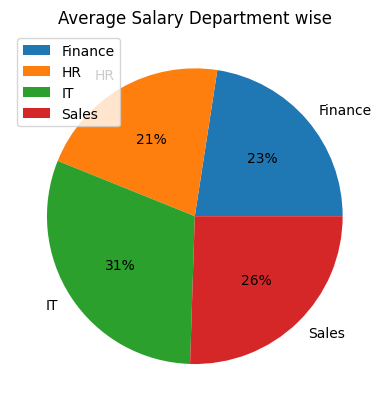

In [223]:
#Find average salary per department.
sql = "SELECT Department,AVG(salary) as average_salary FROM Employees GROUP BY Department"
df = pd.read_sql(sql, conn)
# for row in cursor.fetchall():
#   print(row)

print(df)
mylabels = df.Department
plt.pie(df.average_salary,labels=mylabels,autopct='%.0f%%')
plt.title("Average Salary Department wise")
plt.legend()
plt.show()


  Department  total_employee
0    Finance              10
1         HR               9
2         IT              16
3      Sales              15


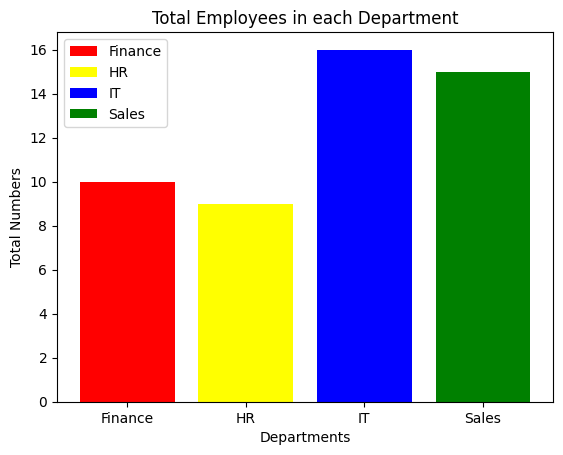

In [224]:
#Count employees by department.
#Find average salary per department.
sql = "SELECT Department,count(EmpID) as total_employee FROM Employees GROUP BY Department"
df = pd.read_sql(sql, conn)
# for row in cursor.fetchall():
#   print(row)
print(df)
mylabels = df.Department
custom_colors = ['red','yellow','blue','green']
plt.bar(df.Department,df.total_employee,label=mylabels,color = custom_colors)
plt.xlabel('Departments')
plt.ylabel('Total Numbers')
plt.title("Total Employees in each Department")
plt.legend()
plt.show()


   Gender  total
0  Female     23
1    Male     27


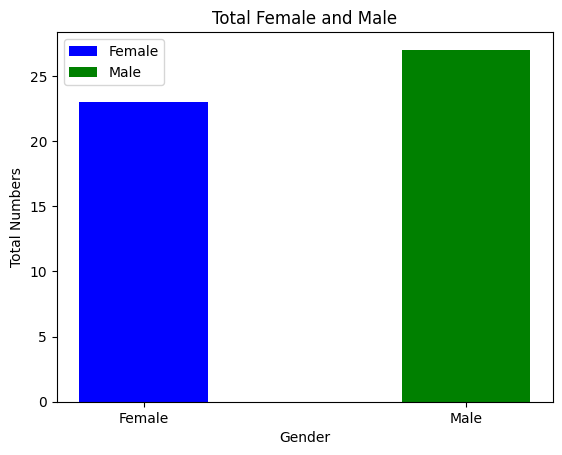

In [225]:
#Count employees by gender
sql = "SELECT Gender , count(EmpID) as total FROM Employees GROUP BY Gender"
df = pd.read_sql(sql, conn)
print(df)

mylabels = df.Gender
custom_colors = ['blue','green']
plt.bar(df.Gender,df.total,label=mylabels,color = custom_colors,width=0.4)
plt.xlabel('Gender')
plt.ylabel('Total Numbers')
plt.title("Total Female and Male")
plt.legend()
plt.show()


In [226]:
#Find department with the highest average salary.
sql = "SELECT Department,AVG(salary) as avg_salary from Employees GROUP By Department ORDER BY avg_salary DESC LIMIT 1"
df = pd.read_sql(sql, conn)
print(df)


  Department  avg_salary
0         IT     66437.5


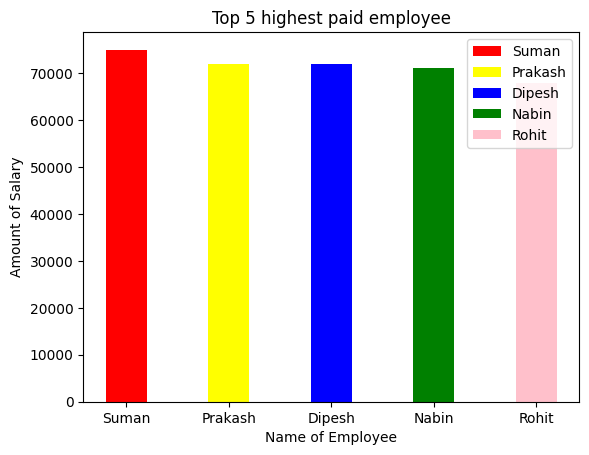

In [227]:
#Show top 5 highest-paid employees. Show employees ordered by department then salary descending.
sql = "SELECT DISTINCT  Name,salary from Employees ORDER BY salary DESC LIMIT 5"
df = pd.read_sql(sql, conn)


mylabels = df.Name
custom_colors = ['red','yellow','blue','green','pink']
plt.bar(df["Name"],df["Salary"],label=mylabels,color = custom_colors,width=0.4,)
plt.xlabel('Name of Employee')
plt.ylabel('Amount of Salary')
plt.title("Top 5 highest paid employee")
plt.legend()
plt.show()


In [228]:
#Show employees ordered by department then salary descending.
sql = "SELECT * from Employees ORDER BY department,salary desc"
df = pd.read_sql(sql, conn)
print(df)

   EmpID     Name Department  Gender  Salary  YearsAtCompany  Age  \
0   E017      Raj    Finance    Male   51000               3   31   
1   E009    Rekha    Finance  Female   50000               3   30   
2   E027   Ramesh    Finance    Male   50000               2   30   
3   E037    Rekha    Finance  Female   50000               3   31   
4   E047   Ramesh    Finance    Male   50000               3   31   
5   E023    Kamal    Finance    Male   49000               4   32   
6   E013    Dipak    Finance    Male   48000               4   33   
7   E034    Dipak    Finance    Male   48000               3   33   
8   E005   Ramesh    Finance    Male   47000               5   35   
9   E043   Sanjay    Finance    Male   47000               4   33   
10  E002     Sita         HR  Female   48000               4   32   
11  E018    Pooja         HR  Female   47000               2   26   
12  E033    Pooja         HR  Female   47000               2   26   
13  E048    Pooja         HR  Fema

In [229]:
#List employees with their department name.
sql = "SELECT Name,Department from Employees"
df = pd.read_sql(sql, conn)
print(df)



       Name Department
0       Ram      Sales
1      Sita         HR
2      Hari         IT
3      Gita      Sales
4    Ramesh    Finance
5     Suman         IT
6     Anita         HR
7    Bikash      Sales
8     Rekha    Finance
9     Sujan         IT
10    Kiran         IT
11     Mina      Sales
12    Dipak    Finance
13    Laxmi         HR
14  Prakash         IT
15   Sabina      Sales
16      Raj    Finance
17    Pooja         HR
18     Anil         IT
19    Sonal      Sales
20    Manoj         IT
21     Rina      Sales
22    Kamal    Finance
23     Sita         HR
24    Nabin         IT
25     Bina      Sales
26   Ramesh    Finance
27    Anita         HR
28    Sujan         IT
29     Mina      Sales
30      Ram      Sales
31     Hari         IT
32    Pooja         HR
33    Dipak    Finance
34   Sabina      Sales
35     Anil         IT
36    Rekha    Finance
37     Gita      Sales
38    Suman         IT
39    Kiran         IT
40    Rohit         IT
41     Maya      Sales
42   Sanjay

In [230]:
#Find employees in “IT” department earning more than 50k.
sql = "SELECT * from Employees WHERE department = 'IT' AND salary > 50000"
df = pd.read_sql(sql, conn)
print(df)


   EmpID     Name Department Gender  Salary  YearsAtCompany  Age  \
0   E003     Hari         IT   Male   60000               1   26   
1   E006    Suman         IT   Male   75000               6   38   
2   E010    Sujan         IT   Male   65000               2   28   
3   E011    Kiran         IT   Male   61000               3   29   
4   E015  Prakash         IT   Male   72000               5   36   
5   E019     Anil         IT   Male   64000               4   30   
6   E021    Manoj         IT   Male   63000               3   29   
7   E025    Nabin         IT   Male   71000               5   35   
8   E029    Sujan         IT   Male   65000               4   31   
9   E032     Hari         IT   Male   62000               1   27   
10  E036     Anil         IT   Male   64000               4   30   
11  E039    Suman         IT   Male   75000               6   38   
12  E040    Kiran         IT   Male   61000               3   29   
13  E041    Rohit         IT   Male   68000     

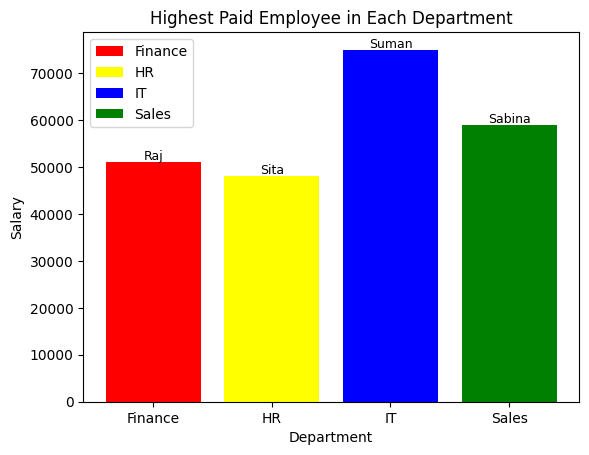

In [231]:
#Show department-wise highest paid employee.
sql = """
            SELECT Distinct *
            FROM (
                SELECT
                    Name,Department,Salary,
                    RANK() OVER (PARTITION BY Department ORDER BY Salary DESC) AS emp_rank
                FROM Employees
            ) AS ranked
            WHERE emp_rank = 1;
          """
df = pd.read_sql(sql, conn)

custom_colors = ['red','yellow','blue','green','pink']
plt.bar(df["Department"], df["Salary"], color=custom_colors,label=["Finance","HR","IT","Sales"])
for i, val in enumerate(df["Salary"]):
    plt.text(i, val + 500, df["Name"][i], ha='center', fontsize=9)
plt.xlabel("Department")
plt.ylabel("Salary")
plt.title("Highest Paid Employee in Each Department")
plt.legend()
plt.show()





In [232]:
#Find employees earning above average salary.
sql = """
            SELECT Distinct *
            FROM Employees
            WHERE salary > (
                SELECT AVG(salary)
                FROM Employees GROUP BY Department
            )
          """
df = pd.read_sql(sql, conn)
print(df)


   EmpID     Name Department  Gender  Salary  YearsAtCompany  Age  \
0   E001      Ram      Sales    Male   55000               2   28   
1   E003     Hari         IT    Male   60000               1   26   
2   E004     Gita      Sales  Female   52000               3   29   
3   E006    Suman         IT    Male   75000               6   38   
4   E008   Bikash      Sales    Male   58000               1   25   
5   E009    Rekha    Finance  Female   50000               3   30   
6   E010    Sujan         IT    Male   65000               2   28   
7   E011    Kiran         IT    Male   61000               3   29   
8   E012     Mina      Sales  Female   53000               2   27   
9   E015  Prakash         IT    Male   72000               5   36   
10  E016   Sabina      Sales  Female   59000               2   28   
11  E017      Raj    Finance    Male   51000               3   31   
12  E019     Anil         IT    Male   64000               4   30   
13  E020    Sonal      Sales  Fema

In [233]:
#Find employees who earn more than “Ram”.
sql =  """
            SELECT Distinct *
            FROM Employees
            WHERE salary > (
                SELECT salary
                FROM Employees WHERE Name = 'Ram'
            )
          """
df = pd.read_sql(sql, conn)
print(df)

   EmpID     Name Department  Gender  Salary  YearsAtCompany  Age  \
0   E003     Hari         IT    Male   60000               1   26   
1   E006    Suman         IT    Male   75000               6   38   
2   E008   Bikash      Sales    Male   58000               1   25   
3   E010    Sujan         IT    Male   65000               2   28   
4   E011    Kiran         IT    Male   61000               3   29   
5   E015  Prakash         IT    Male   72000               5   36   
6   E016   Sabina      Sales  Female   59000               2   28   
7   E019     Anil         IT    Male   64000               4   30   
8   E020    Sonal      Sales  Female   56000               1   24   
9   E021    Manoj         IT    Male   63000               3   29   
10  E025    Nabin         IT    Male   71000               5   35   
11  E026     Bina      Sales  Female   57000               1   25   
12  E029    Sujan         IT    Male   65000               4   31   
13  E031      Ram      Sales    Ma

In [234]:
#Find employees who earn the minimum salary in their department.
sql = """
            SELECT Distinct *
            FROM (
                SELECT
                    Name,Department,Salary,
                    RANK() OVER (PARTITION BY Department ORDER BY Salary) AS emp_rank
                FROM Employees
            ) AS ranked
            WHERE emp_rank = 1;
          """
df = pd.read_sql(sql, conn)
print(df)


     Name Department  Salary  emp_rank
0  Ramesh    Finance   47000         1
1  Sanjay    Finance   47000         1
2   Anita         HR   45000         1
3    Hari         IT   60000         1
4    Gita      Sales   52000         1


In [235]:
#Find top 3 earners in each department.
sql = """
            SELECT *
            FROM (
                SELECT
                    Name,Department,Salary,
                    ROW_NUMBER() OVER (PARTITION BY Department ORDER BY Salary DESC) AS emp_rank
                FROM Employees
            ) AS ranked
            WHERE emp_rank
            <= 3;
          """
df = pd.read_sql(sql, conn)
print(df)

       Name Department  Salary  emp_rank
0       Raj    Finance   51000         1
1     Rekha    Finance   50000         2
2    Ramesh    Finance   50000         3
3      Sita         HR   48000         1
4     Pooja         HR   47000         2
5     Pooja         HR   47000         3
6     Suman         IT   75000         1
7     Suman         IT   75000         2
8   Prakash         IT   72000         3
9    Sabina      Sales   59000         1
10   Sabina      Sales   59000         2
11   Bikash      Sales   58000         3


In [236]:
#Calculate running total of salaries by department.
sql = """
            SELECT Name,Salary,Department,
            SUM(Salary)
            OVER(PARTITION BY Department
            ORDER BY Salary
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
            ) AS total_salary
            FROM employees;
          """
df = pd.read_sql(sql, conn)
print(df)


       Name  Salary Department  total_salary
0    Ramesh   47000    Finance         47000
1    Sanjay   47000    Finance         94000
2     Dipak   48000    Finance        142000
3     Dipak   48000    Finance        190000
4     Kamal   49000    Finance        239000
5     Rekha   50000    Finance        289000
6    Ramesh   50000    Finance        339000
7     Rekha   50000    Finance        389000
8    Ramesh   50000    Finance        439000
9       Raj   51000    Finance        490000
10    Anita   45000         HR         45000
11    Anita   45000         HR         90000
12    Laxmi   46000         HR        136000
13     Sita   46000         HR        182000
14    Rekha   46000         HR        228000
15    Pooja   47000         HR        275000
16    Pooja   47000         HR        322000
17    Pooja   47000         HR        369000
18     Sita   48000         HR        417000
19     Hari   60000         IT         60000
20    Kiran   61000         IT        121000
21    Kira

In [240]:
#Compare each employee’s salary to department average.


sql = """
          SELECT Name,Salary,
          AVG(Salary) OVER(PARTITION BY Department) AS dept_avg_salary,
          Salary - AVG(Salary) OVER(PARTITION BY Department) AS difference
          FROM Employees
      """

df = pd.read_sql(sql, conn)
print(df)

       Name  Salary  dept_avg_salary   difference
0    Ramesh   47000     49000.000000 -2000.000000
1     Rekha   50000     49000.000000  1000.000000
2     Dipak   48000     49000.000000 -1000.000000
3       Raj   51000     49000.000000  2000.000000
4     Kamal   49000     49000.000000     0.000000
5    Ramesh   50000     49000.000000  1000.000000
6     Dipak   48000     49000.000000 -1000.000000
7     Rekha   50000     49000.000000  1000.000000
8    Sanjay   47000     49000.000000 -2000.000000
9    Ramesh   50000     49000.000000  1000.000000
10     Sita   48000     46333.333333  1666.666667
11    Anita   45000     46333.333333 -1333.333333
12    Laxmi   46000     46333.333333  -333.333333
13    Pooja   47000     46333.333333   666.666667
14     Sita   46000     46333.333333  -333.333333
15    Anita   45000     46333.333333 -1333.333333
16    Pooja   47000     46333.333333   666.666667
17    Rekha   46000     46333.333333  -333.333333
18    Pooja   47000     46333.333333   666.666667
